Moles balance: A+B+C:
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


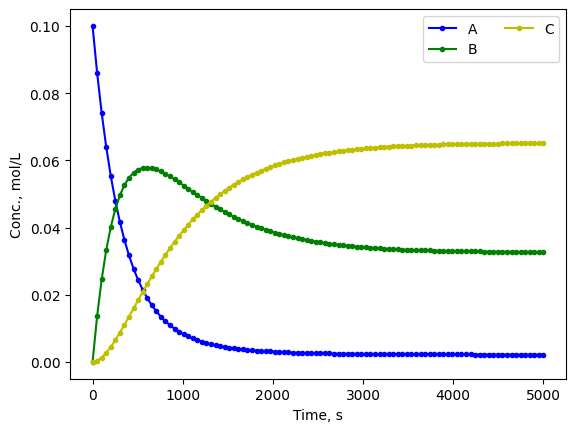

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint # to solve ODE numerically

# The reaction scheme:
# A <=> B <=> C i.e.:

# A -> B, k1
# B -> A, k2
# B -> C, k3
# C -> B, k4



def model(y, t):
    A = y[0]
    B = y[1]
    C = y[2]
    
    dAdt = -k1*A + k2*B
    dBdt = k1*A - k2*B - k3*B + k4*C
    dCdt = k3*B - k4*C
    
    return [dAdt, dBdt, dCdt] # return derivatives

# Parameters
k1 = 3e-3 #is in seconds
k2 = 2e-4 #
k3 = 1e-3
k4 = 0.5e-3
A0 = 0.1 # mol/L
B0 = 0 # mol/L
C0 = 0
# Time span
t = np.linspace(0, 5000, 100) # 0 - 5000 s
# Initial conditions
ic = [A0, B0, C0]

# Integrate numerically ODEs
results = odeint(model, ic, t)

# Unpack concentrations
A = results[:,0]
B = results[:,1]
C = results[:,2]
# checking the results
# moles balance:
print ("Moles balance: A+B+C:")
print (B+A+C)
# Plot the results
plt.plot(t, A, 'b.-', label = 'A')
plt.plot(t, B, 'g.-', label = 'B')
plt.plot(t, C, 'y.-', label = 'C')
plt.ylabel('Conc., mol/L')
plt.xlabel('Time, s')
plt.legend(ncol=2) 